In [21]:
import ds
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib.colors import ListedColormap
import math

df = pd.read_csv("Cleaned_DF.csv")

In [22]:
df.drop("Unnamed: 0", axis = 1, inplace = True)

In [23]:
df

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side,route
0,0.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,2.0,0.0,1.0,8.0
1,0.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,1.0,6.0,0.0,2.0,2.0
2,0.0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,-1.0,1.0,0.0,2.0,8.0
3,0.0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,-1.0,1.0,0.0,2.0,8.0
4,0.0,16.0,0.0,303.0,70.0,151.0,565.0,2.0,1.0,6.0,1.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7669,0.0,41.0,1.0,0.0,6819.0,0.0,1643.0,74.0,-1.0,1.0,98.0,1.0,7.0
7670,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,7.0,1499.0,2.0,3.0
7671,0.0,26.0,0.0,0.0,0.0,1872.0,1.0,0.0,1.0,7.0,1500.0,2.0,2.0
7672,0.0,32.0,0.0,0.0,1049.0,0.0,353.0,3235.0,-1.0,5.0,608.0,2.0,7.0


In [24]:
features = ['CryoSleep','Age','VIP','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Deck','Num','Side','route']

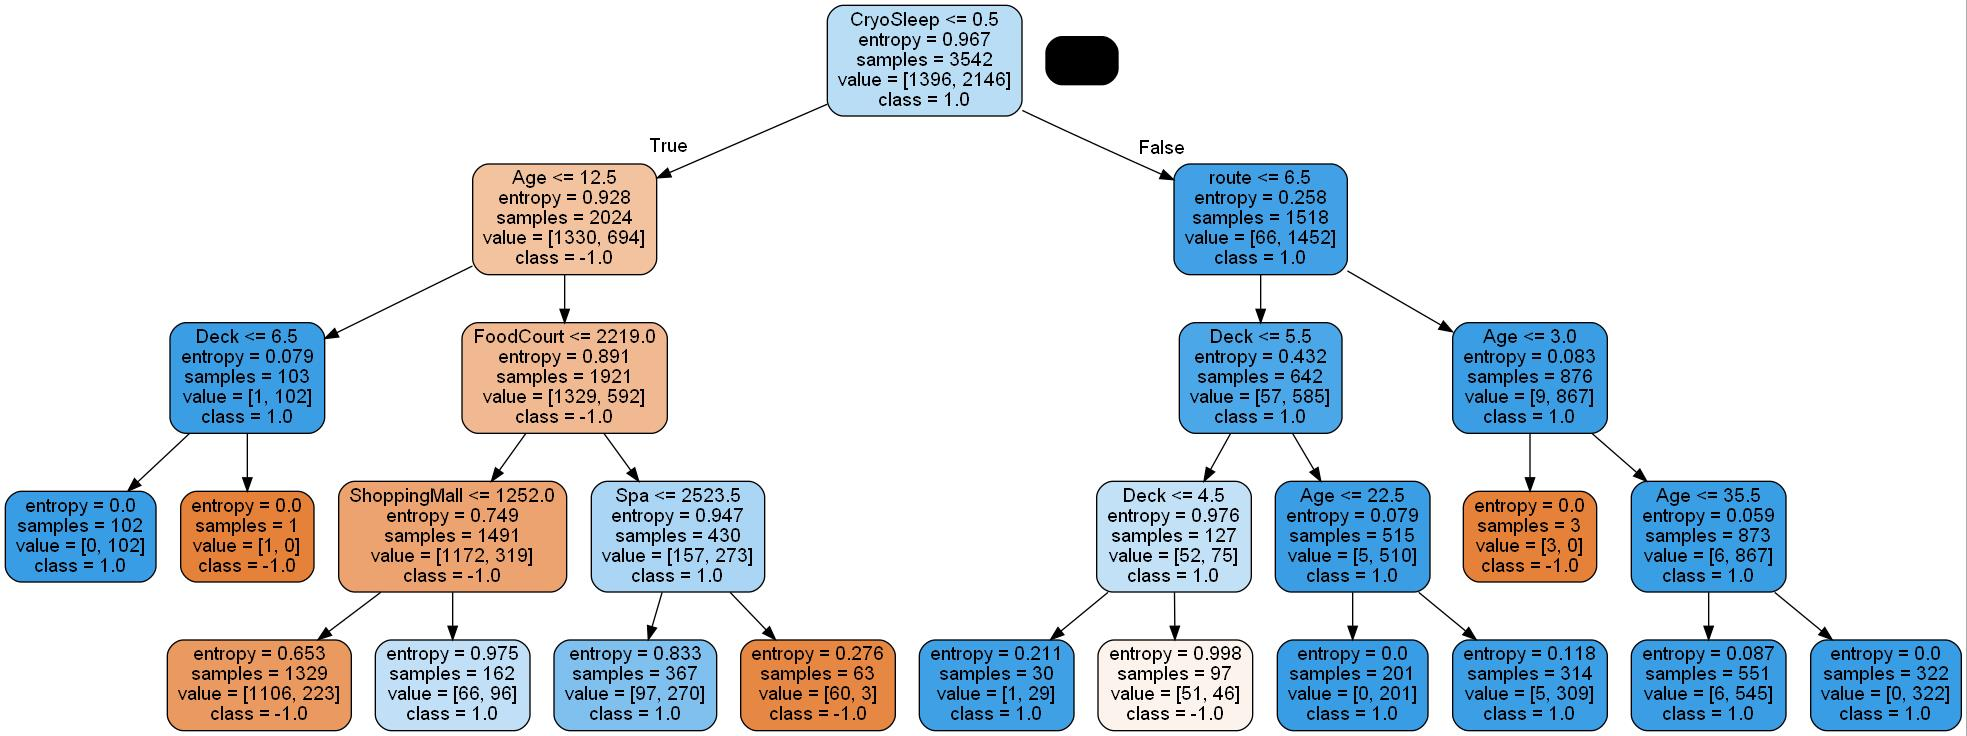

test size:  3542 , total errors in test: 12.62%
index = predicted, columns = factual, in %:
          -1          1
-1  34.47205   7.679277
 1  4.940711  52.907962


c:\Users\Папа\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [25]:
data_exploration_tree = ds.divide_frame(dataf = df[df['route']>3.5],columns = features,teacher_column = "Transported",classifier = 'Tree', criterion_tree = "entropy", depth = 4, random_state_sample = 5,random_state_ppn = 2, fraction = 1)

3.5 < route
1519 CryoSleep == 1 ==> 1.0 [66,1453]

In [26]:
mask = (df['CryoSleep'] == 0)&(df['route']>3.5)

In [27]:
df_rest = df[mask]

In [28]:
df_rest.shape

(2024, 13)

In [29]:
df_rest

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side,route
0,0.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,2.0,0.0,1.0,8.0
2,0.0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,-1.0,1.0,0.0,2.0,8.0
3,0.0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,-1.0,1.0,0.0,2.0,8.0
11,0.0,45.0,0.0,39.0,7295.0,589.0,110.0,124.0,1.0,2.0,1.0,1.0,7.0
12,0.0,32.0,0.0,73.0,0.0,1123.0,0.0,113.0,1.0,6.0,1.0,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7667,0.0,32.0,0.0,1.0,1146.0,0.0,50.0,34.0,-1.0,1.0,97.0,1.0,8.0
7668,0.0,30.0,0.0,0.0,3208.0,0.0,2.0,330.0,1.0,1.0,97.0,1.0,8.0
7669,0.0,41.0,1.0,0.0,6819.0,0.0,1643.0,74.0,-1.0,1.0,98.0,1.0,7.0
7672,0.0,32.0,0.0,0.0,1049.0,0.0,353.0,3235.0,-1.0,5.0,608.0,2.0,7.0


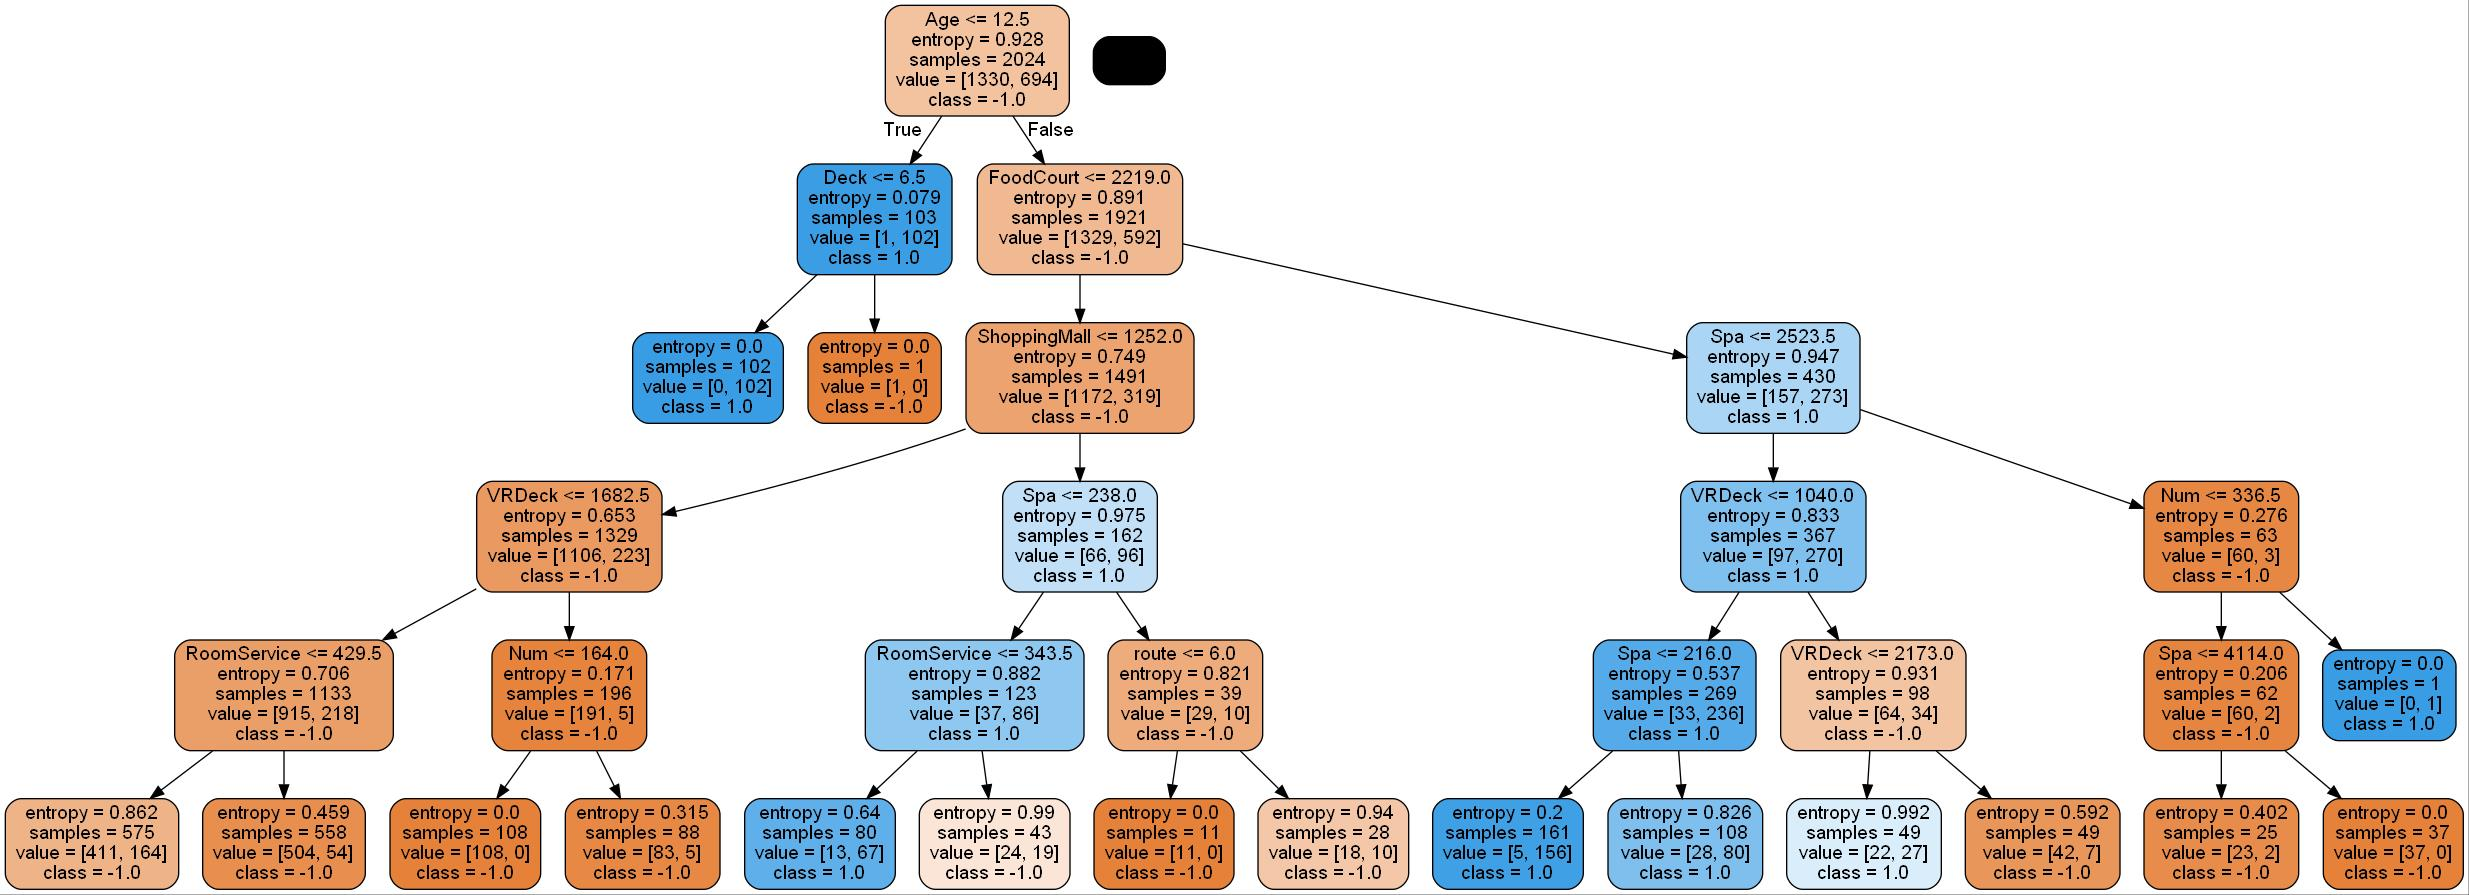

test size:  2024 , total errors in test: 16.25%
index = predicted, columns = factual, in %:
           -1          1
-1  62.351779  12.895257
 1   3.359684  21.393281


c:\Users\Папа\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [30]:
tree = ds.divide_frame(dataf = df_rest,columns = features,teacher_column = "Transported",classifier = 'Tree', criterion_tree = "entropy", depth = 5, random_state_sample = 5,random_state_ppn = 2, fraction = 1)

route > 3.5 & age <= 12.5 & CryoSleep == 0 ==> 1 [1,102]

In [31]:
mask1 = (df['CryoSleep'] == 0)&(df['route']>3.5)&(df['Age']>12.5)
features = ['Age','VIP','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Deck','Num','Side','route']
df_rest1 = df[mask1][features+["Transported"]]
df_rest1.shape

(1921, 12)

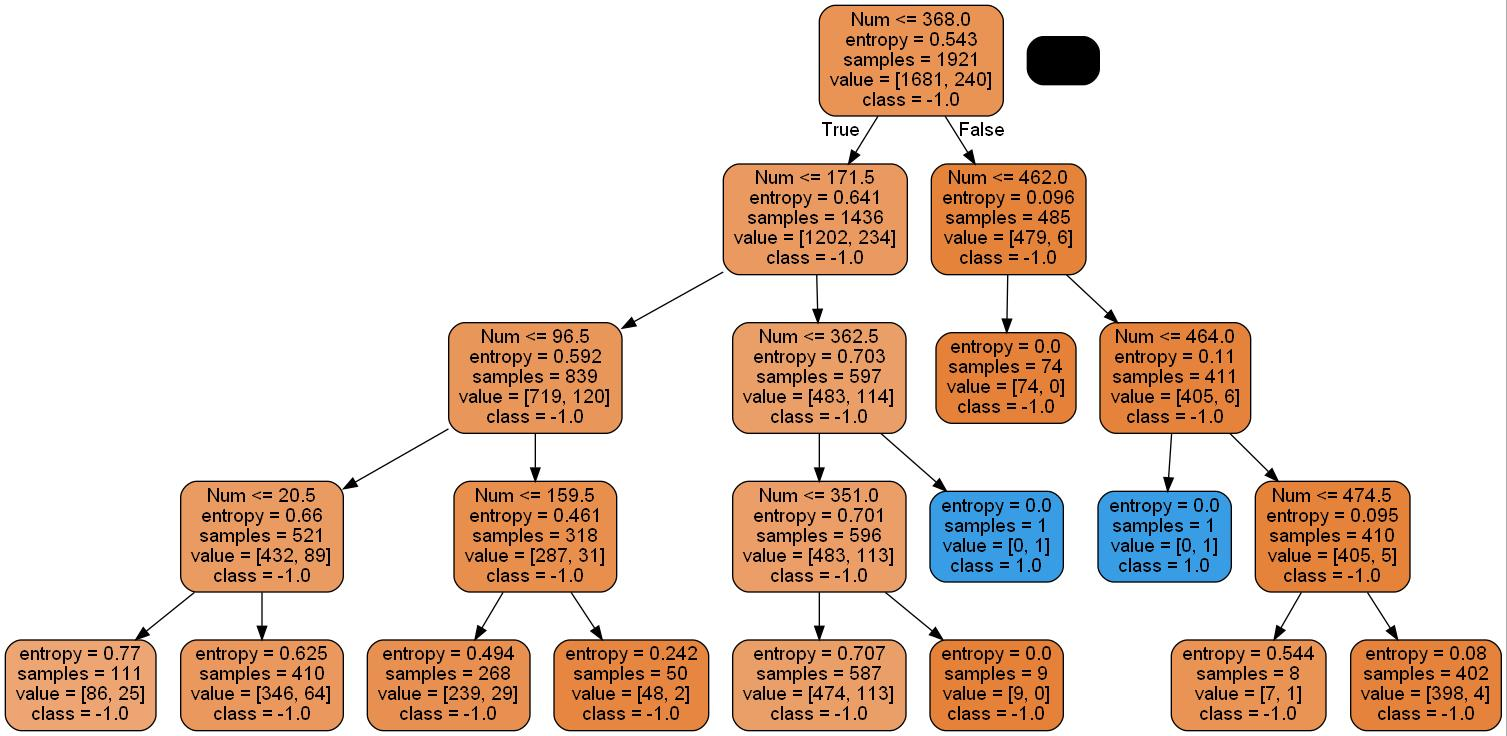

c:\Users\Папа\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

In [32]:
dz = df_rest1

c = ["Num","VRDeck","FoodCourt","Spa"]

m1 = dz["VRDeck"].max()/10 #<350
m2 = dz["FoodCourt"].max()/10 #<350
m3 = dz["Spa"].max()/10  #<368

dz["Transported"] = df_rest1["Spa"]>m3

tree = ds.divide_frame(dataf = dz,columns = ["Num"],teacher_column = "Transported",classifier = 'Tree', criterion_tree = "entropy", depth = 4, random_state_sample = 5,fraction = 1)


In [33]:
mask2 = (df['CryoSleep'] == 0)&(df['route']>3.5)&(df['Age']>12.5)&(df['Num']>=350) #unservices people
df_rest2 = df[mask2]

df_rest2.shape

(496, 13)

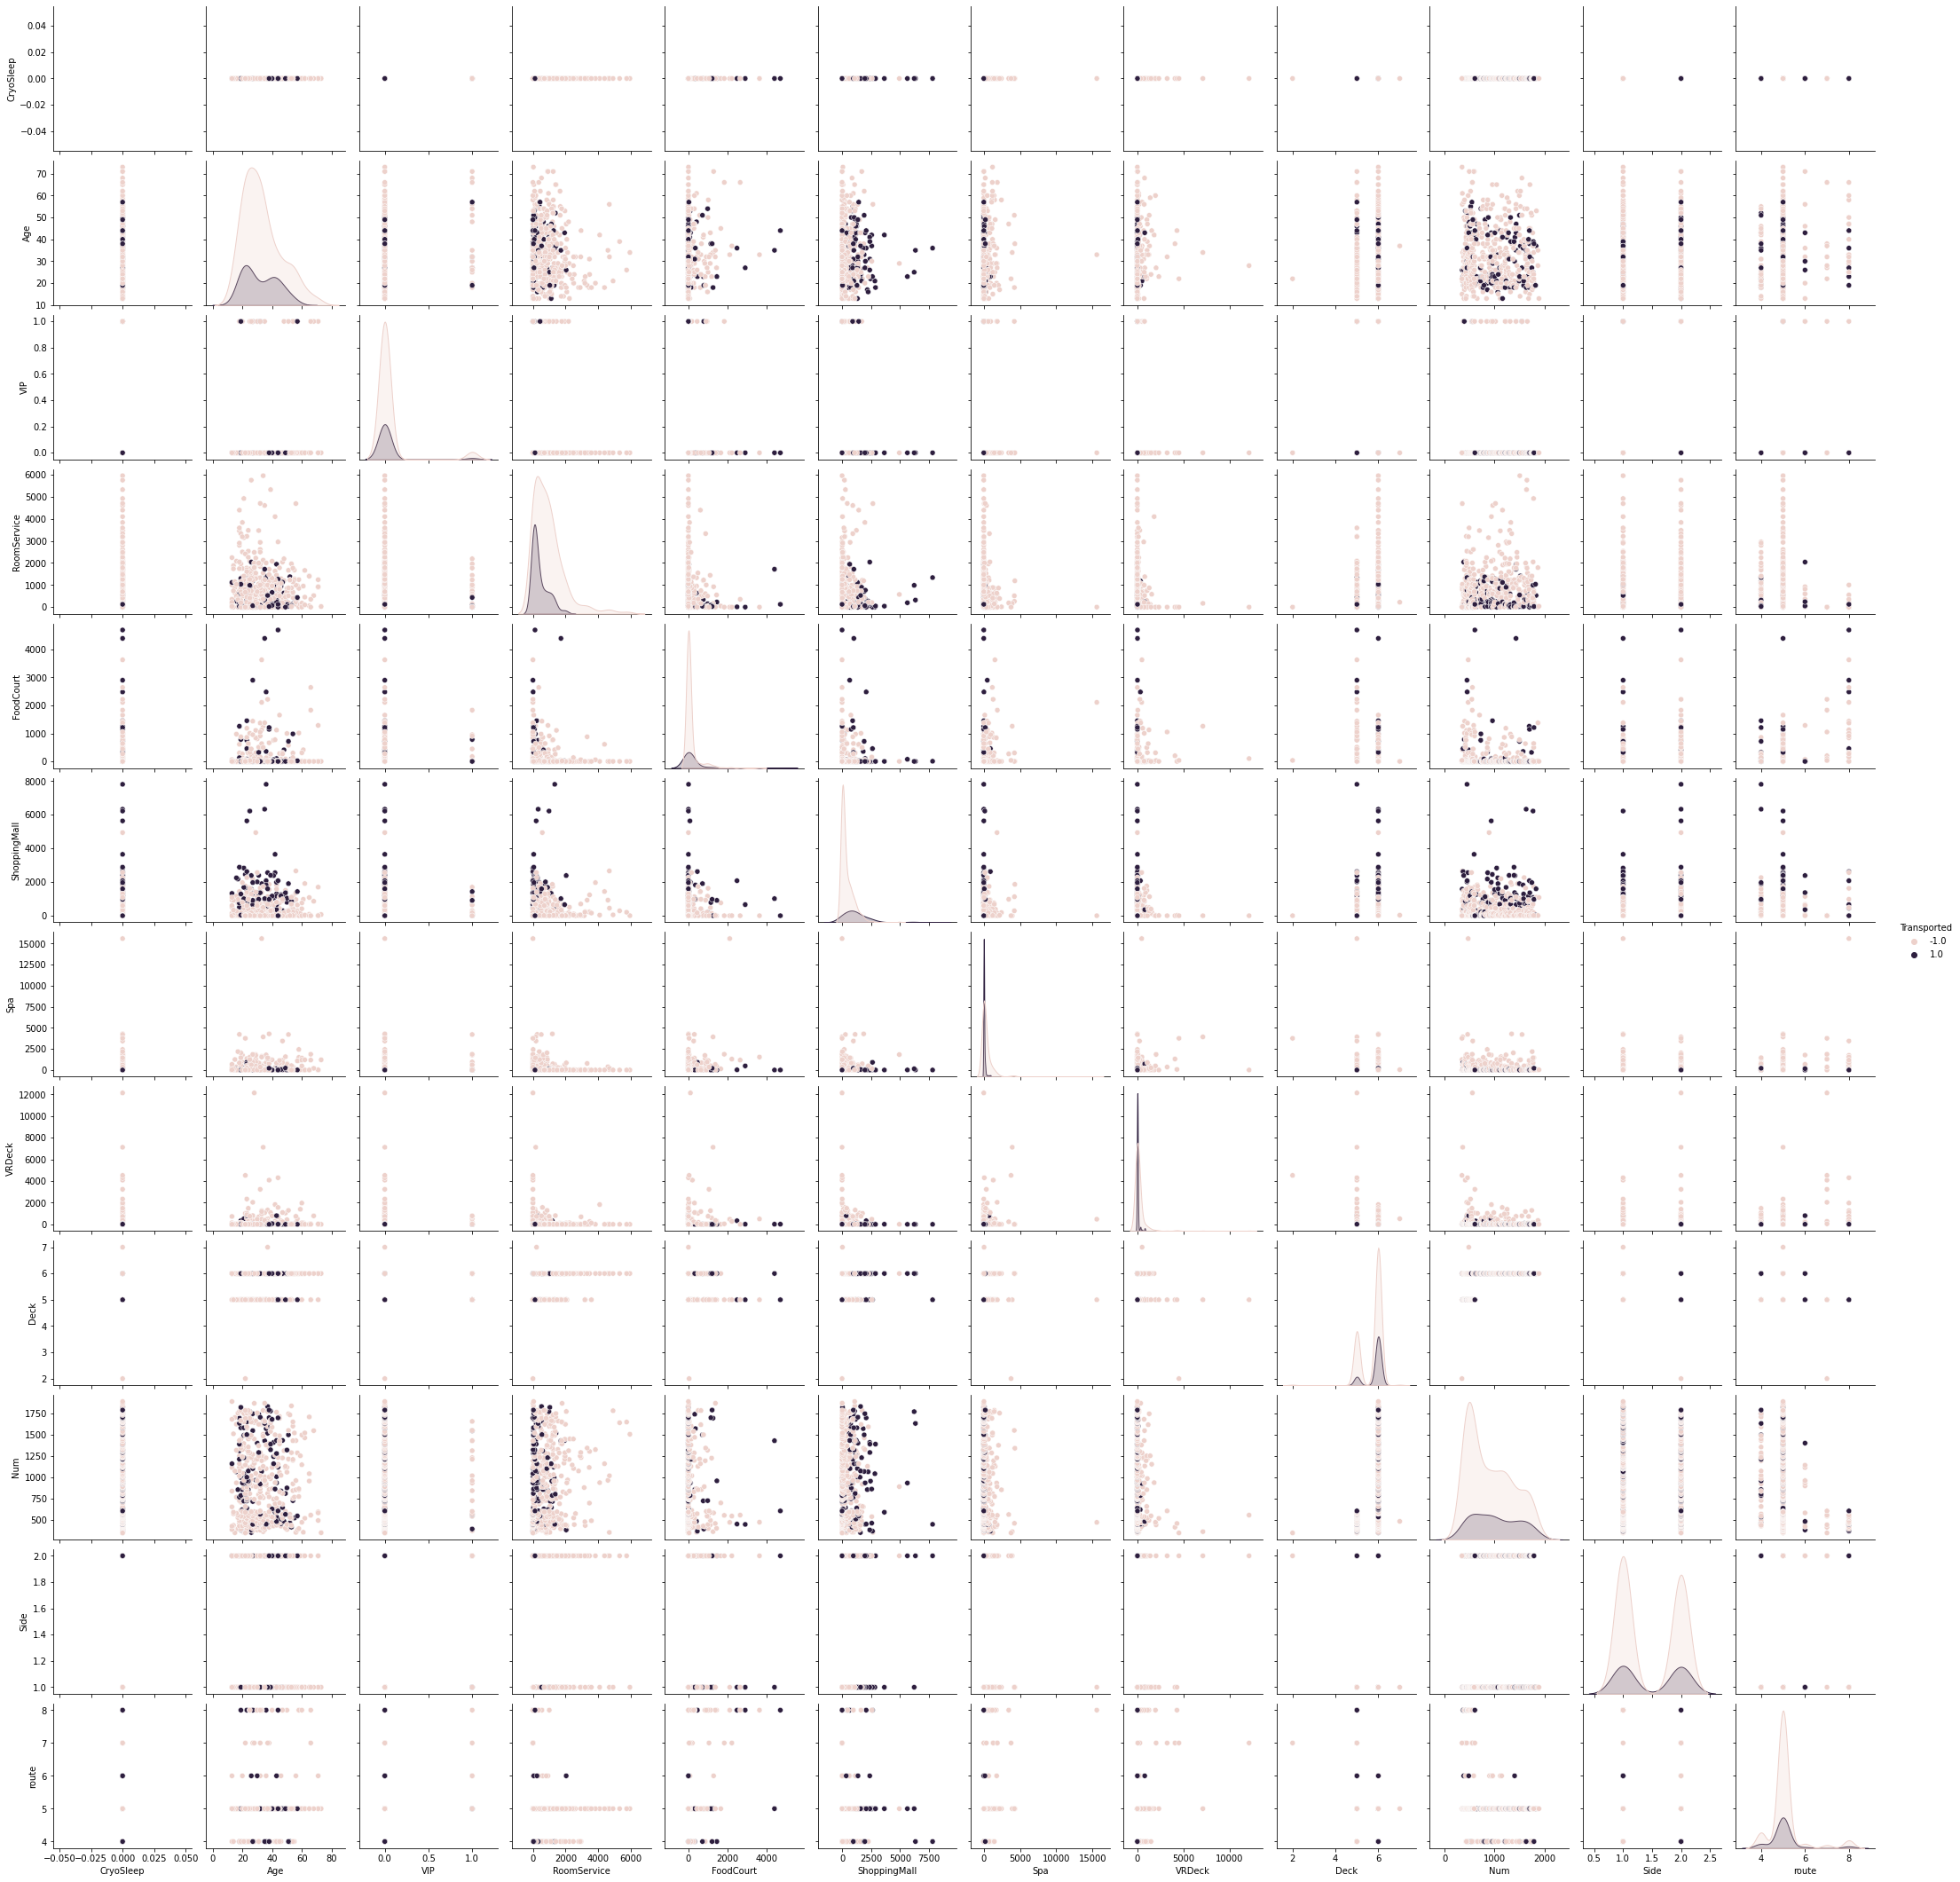

In [34]:
sb.pairplot(df_rest2, hue = "Transported")

KeyboardInterrupt: 

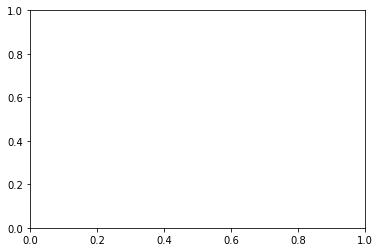

In [15]:
col_s = ['Spa','Age']
#dz = df_rest1[col_s+["Transported"]]

#x1_mean = dz[col_s[0]].median()
#x1_sigma = dz[col_s[0]].std()

#x2_mean = dz[col_s[1]].median()
#x2_sigma = dz[col_s[1]].std()

#for i in dz.index:
#    dz.loc[i,col_s[0]] = (dz.loc[i,col_s[0]] - x1_mean)/x1_sigma
#    dz.loc[i,col_s[1]] = (dz.loc[i,col_s[1]] - x2_mean)/x2_sigma


ppn1 = ds.divide_frame(df_rest2,col_s,teacher_column = "Transported",classifier = "Tree",random_state_sample = 1, random_state_ppn = 1, eta = 0.01, iter = 1000, plot = True,res = 0.01)

From here we try to find other reelations in impure frame

In [ ]:
def sigmoid(x): 
    return 1/(1+math.exp(-x))

In [ ]:
def z(ppn,x1,x2):
    return ppn.w_[0]+ ppn.w_[1]*x1 + ppn.w_[2]*x2

In [ ]:
features = ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Transported']
d1 = df_reduced[features]

sb.pairplot(d1,hue = "Transported")

In [ ]:
corrMatrix = d1.corr()

sb.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
col_s = ['FoodCourt','Spa']
dz = d1[col_s+["Transported"]]

x1_mean = dz[col_s[0]].mean()
x1_sigma = dz[col_s[0]].std()

x2_mean = dz[col_s[1]].mean()
x2_sigma = dz[col_s[1]].std()

for i in dz.index:
    dz.loc[i,col_s[0]] = (dz.loc[i,col_s[0]] - x1_mean)/x1_sigma
    dz.loc[i,col_s[1]] = (dz.loc[i,col_s[1]] - x2_mean)/x2_sigma

In [ ]:
ppn = ds.divide_frame(dataf = dz,columns = col_s,teacher_column = "Transported",classifier = 'Perceptron', random_state_sample = 4,random_state_ppn = 3, fraction = 0.7, eta = 0.001, iter = 30,plot = True, res =0.01)

In [ ]:
ppn = ds.divide_frame(dataf = dz,columns = col_s,teacher_column = "Transported",classifier = 'SVC', kernel_ = 'rbf', gamma_ = 1, c=1, degree_ = 3, random_state_sample = 1,random_state_ppn = 1, fraction = 0.7, eta = 0.0001, iter = 300,plot = True, res =0.01)

In [ ]:
ppn = ds.divide_frame(dataf = dz,columns = col_s,teacher_column = "Transported",classifier = 'SVC', kernel_ = 'poly', gamma_ = 1, c=1, degree_ = 3, random_state_sample = 1,random_state_ppn = 1, fraction = 0.9,plot = True, res =0.01)

In [ ]:
ppn = ds.divide_frame(dataf = dz,columns = col_s,teacher_column = "Transported",classifier = 'SVC', kernel_ = 'linear', gamma_ = 1, c=2, random_state_sample = 2,random_state_ppn = 3, fraction = 0.7,plot = True, res =0.01)

In [ ]:
ppn = ds.divide_frame(dataf = dz,columns = col_s,teacher_column = "Transported",classifier = 'KNN', dimension = 2, neighbors =2, random_state_sample = 1,random_state_ppn = 1, fraction = 0.9, plot = True, res =0.01)

In [ ]:
ppn = ds.divide_frame(dataf = dz,columns = col_s,teacher_column = "Transported",classifier = 'Tree', criterion_tree = "entropy", depth = 5, random_state_sample = 1,random_state_ppn = 2, fraction = 0.8,plot = True, res = 0.01)

In [ ]:
ppn = ds.divide_frame(dataf = dz,columns = col_s,teacher_column = "Transported",classifier = 'Adaline', random_state_sample = 2,random_state_ppn = 3, fraction = 0.7, eta = 0.0001, iter = 150,plot = True, res = 0.01)

In [ ]:
for i in d1.index:
    d1.loc[i,'f1'] = sigmoid(z(ppn,d1.loc[i,col_s[0]],d1.loc[i,col_s[1]]))

In [ ]:
corrMatrix = d1.corr()

sb.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
d1.head(20)

In [ ]:
ppn = ds.divide_frame(dataf = d1,columns = features+['f1'],teacher_column = "Transported",classifier = 'Tree', criterion_tree = "entropy", depth = 3, random_state_sample = 1,random_state_ppn = 2, fraction = 0.8,plot = False, res = 0.01)